<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresión Lineal</h1>

# <font color='red' style='font-size: 30px;'>Conociendo el Conjunto de Datos</font>
<hr style='border: 2px solid red;'>

## Importando librerías

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Librerías opcionales

https://docs.python.org/3/library/warnings.html

In [2]:
import warnings

warnings.filterwarnings('ignore') # o warnings.filterwarnings(action='once')

## El Conjunto de datos y el Proyecto
<hr>

### Fuente: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

**url:** [Fuente de datos](https://raw.githubusercontent.com/mruizolazar/Diplomado_MachineLearning_2021/main/Consumo_cerveza.csv)

### Descripción:

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>La cerveza es una de las bebidas más democráticas y consumidas del mundo. No sin razón, es perfecto para casi cualquier situación, desde el happy hour hasta las grandes fiestas de bodas.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El objetivo de esta capacitación será estimar un modelo de <b>Machine Learning</b> utilizando la técnica de <b>Regresión Lineal</b> para demostrar los impactos de las variables proporcionadas en este conjunto de datos sobre el consumo de cerveza (Y). Al final del proyecto tendremos un modelo de pronóstico para el consumo promedio de cerveza según los insumos de un conjunto de variables (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los datos (muestra) fueron recolectados en São Paulo - Brasil, en un área universitaria, donde hay algunas fiestas con grupos de estudiantes de 18 a 28 años (promedio).</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>fecha</b> - Fecha</li>
    <li><b>temp_promedio</b> - Temperatura Promedio (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>Lluvia</b> - Precipitación (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Si; 0 = No)</li>
    <li><b>consumo</b> - Consumo de Cerveza (litros)</li>
</ul>

## Lectura de los datos

In [3]:
url = 'https://raw.githubusercontent.com/mruizolazar/Diplomado_MachineLearning_2021/main/Consumo_cerveza.csv'
datos = pd.read_csv(url, sep=';')

## Visualizar los datos

In [4]:
datos.head()

,fecha,temp_promedio,temp_min,temp_max,lluvia,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Verificando el tamaño del conjunto de datos

In [5]:
datos.shape

(365, 7)

# <font color='red' style='font-size: 30px;'>Análisis Preliminares</font>
<hr style='border: 2px solid red;'>

## Estadísticas descriptivas

In [6]:
datos.describe()

,temp_promedio,temp_min,temp_max,lluvia,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b>coeficiente de correlación</b> es una medida de asociación lineal entre dos variables y se situa entre <b>-1</b> y <b>+1</b> siendo que <b>-1</b> indica asociación negativa perfecta y <b>+1</b> indica asociación positiva perfecta.</p>

In [7]:
datos.corr().round(4)

,temp_promedio,temp_min,temp_max,lluvia,fds,consumo
temp_promedio,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
lluvia,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


# <font color='red' style='font-size: 30px;'>Comportamiento de la Variable Dependiente (Y)</font>
<hr style='border: 2px solid red;'>

# Análisis gráficas

## Graficando la variable *dependiente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

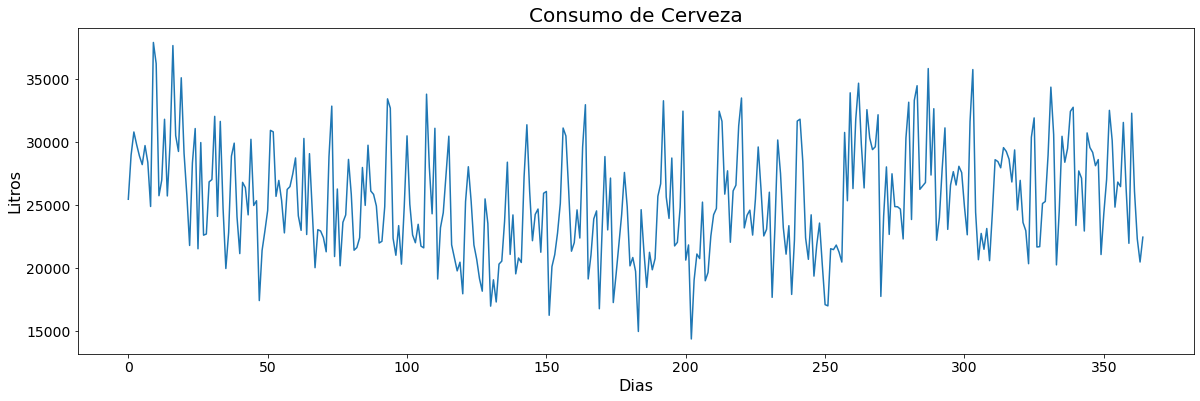

In [8]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveza', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = datos['consumo'].plot(fontsize=14)

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='img/Box-Plot.png'>

## Importando la librería seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una librería Python de visualización de datos basada en el matplotlib. Ella ofrece una interface de alto nível para diseñar gráficos estadísticos.</p>

In [9]:
import seaborn as sns

## Box plot de la variáble *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

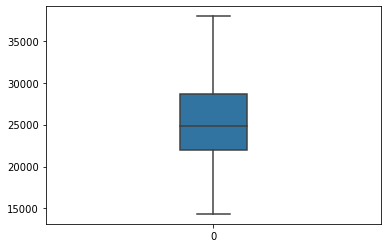

In [10]:
ax = sns.boxplot(data=datos['consumo'], orient='v', width=0.2)

# <font color='red' style='font-size: 30px;'>Box Plot con Dos Variábles</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

<AxesSubplot:title={'center':'Consumo de Cerveza'}, xlabel='Final de Semana', ylabel='Litros'>

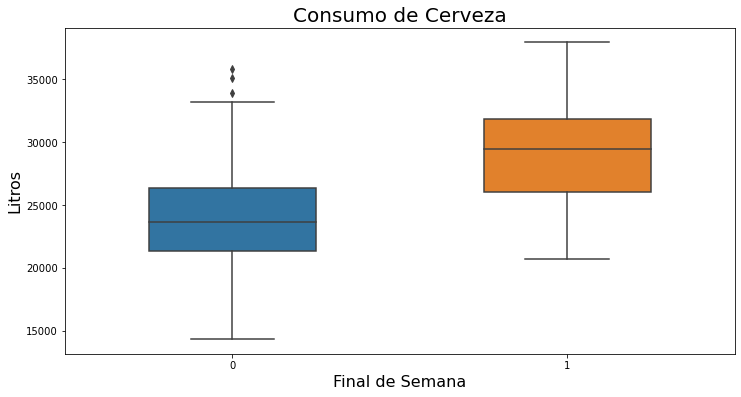

In [11]:
ax = sns.boxplot(data=datos, y='consumo', x='fds', orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveza', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

## Configuración de color y estilo de la biblioteca *seaborn*

### Control de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de colores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [12]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

<AxesSubplot:title={'center':'Consumo de Cerveza'}, xlabel='Final de Semana', ylabel='Litros'>

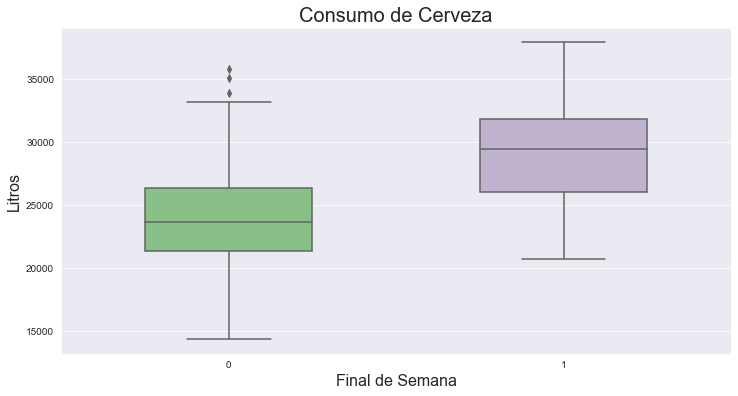

In [13]:
ax = sns.boxplot(data=datos, y='consumo', x='fds', orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveza', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Distribución de Frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias da variáble *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot:title={'center':'Distribución de Frecuencias'}, xlabel='consumo', ylabel='Consumo de Cerveza(Litros)'>

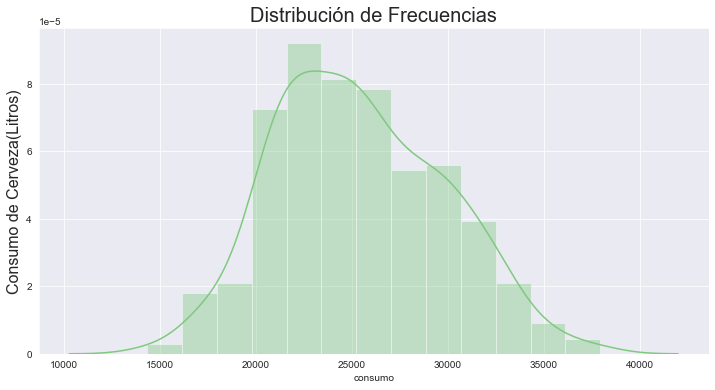

In [72]:
ax = sns.distplot(datos['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribución de Frecuencias', fontsize=20)
ax.set_ylabel('Consumo de Cerveza(Litros)', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Variáble Dependiente X Variábles Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variábles del conjunto de datos

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica el relacionamiento entre pares de variábles en un dataset.</p>

In [15]:
# ax = sns.pairplot(datos)

## Graficando el pairplot fijando solamente una variáble en el eje y

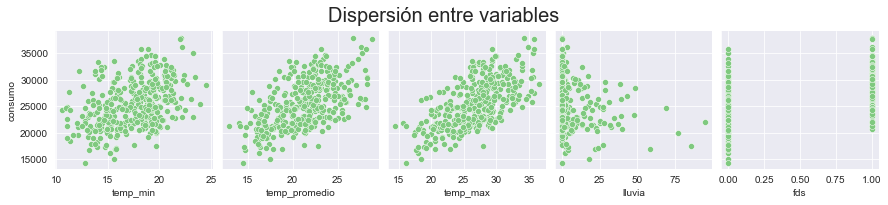

In [16]:
ax = sns.pairplot(datos, y_vars='consumo', x_vars=['temp_min', 'temp_promedio', 'temp_max', 'lluvia', 'fds'])
ax.fig.suptitle('Dispersión entre variables', fontsize=20, y=1.1)
ax

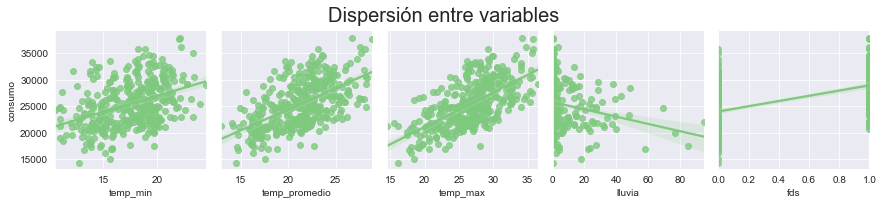

In [17]:
ax = sns.pairplot(datos, y_vars='consumo', x_vars=['temp_min', 'temp_promedio', 'temp_max', 'lluvia', 'fds'], kind='reg')
ax.fig.suptitle('Dispersión entre variables', fontsize=20, y=1.1)
ax

# <font color='red' style='font-size: 30px;'>Variáble Dependiente X Variáble Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica el relacionamiento entre dos variábles y sus respectivas distribuciones de frecuencia.</p>

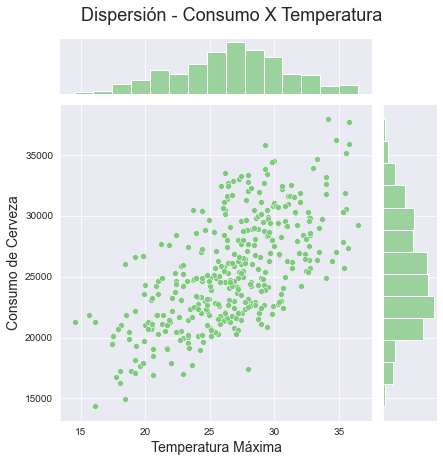

In [18]:
ax = sns.jointplot(x="temp_max", y="consumo", data=datos)
ax.fig.suptitle('Dispersión - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveza", fontsize=14)
ax

## Graficando un jointplot con la recta de regresión estimada

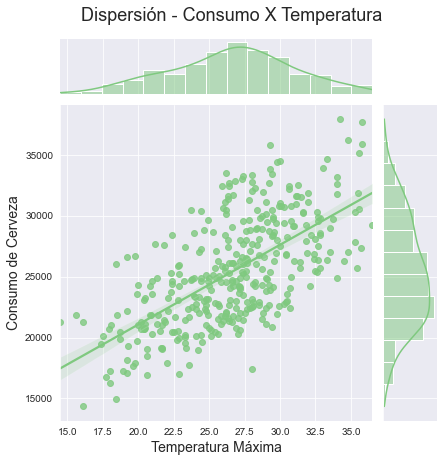

In [19]:
ax = sns.jointplot(x="temp_max", y="consumo", data=datos, kind='reg')
ax.fig.suptitle('Dispersión - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveza", fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Variáble Dependiente X Variábles Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

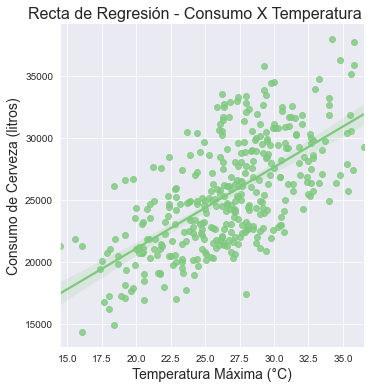

In [20]:
ax= sns.lmplot(x="temp_max", y="consumo", data=datos)
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveza (litros)", fontsize=14)
ax

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la recta de regresión entre dos variábles juntamente con la dispersión entre ellas.</p>

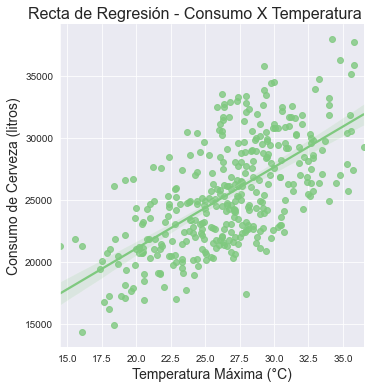

In [21]:
ax= sns.lmplot(x="temp_max", y="consumo", data=datos)
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveza (litros)", fontsize=14)
ax

## Graficando un lmplot utilizando una tercera variáble en el análisis (tipo I)

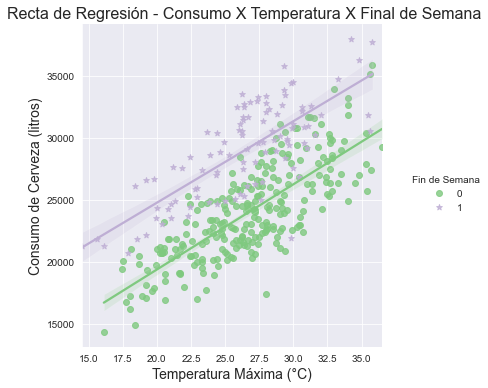

In [22]:
ax= sns.lmplot(x="temp_max", y="consumo", data=datos, hue='fds', markers=['o', '*'], legend=False)
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveza (litros)", fontsize=14)
ax.add_legend(title='Fin de Semana')
ax

## Graficando un lmplot utilizando una tercera variáble en el análisis (tipo II)

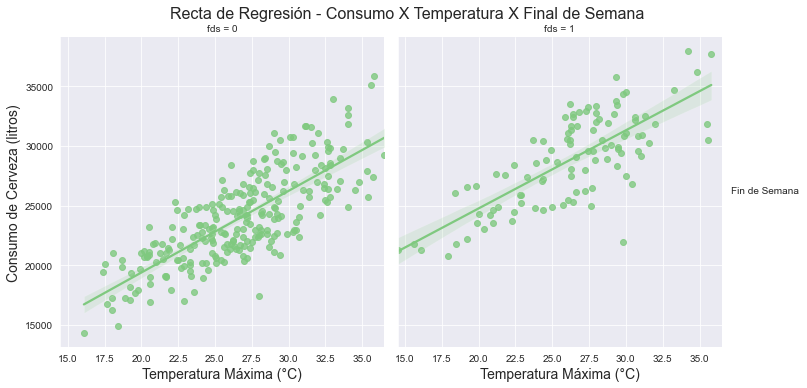

In [23]:
ax= sns.lmplot(x="temp_max", y="consumo", data=datos, col='fds')
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveza (litros)", fontsize=14)
ax.add_legend(title='Fin de Semana')
ax

# <font color='red' style='font-size: 30px;'>Estimando un Modelo de Regresión Lineal para el Consumo</font>
<hr style='border: 2px solid red;'>

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b>dependiente</b>) en relación con una o más variables, las variables explicativas, con el objetivo de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de la segunda</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> <b>scikit-learn</b> es un módulo Python especializado en soluciones para <b>machine learning</b>.</p>



## Importando el *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [24]:
from sklearn.model_selection import train_test_split

## Creando una Series (pandas) para almacenar el Consumo de Cerveza (y)

In [25]:
y = datos['consumo']

## Creando un DataFrame (pandas) para almacenar las variábles explicativas (X)

In [26]:
X = datos[['temp_max','lluvia','fds']]

## Creando los datasets de entrenamiento y de prueba

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2811)

## Verificando los tamaños de los archivos generados por la función *train_test_split*

In [28]:
X_train.shape

(255, 3)

In [29]:
X_test.shape

(110, 3)

In [30]:
X_train.shape[0]+X_test.shape[0]

365

In [31]:
X.shape[0]*0.3

109.5

In [32]:
X.shape[0]*0.7

255.49999999999997

<img width='600px' src='img/reg_01.jpg'>

## Importando *LinearRegression* y *metrics* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando la clase *LinearRegression()*

In [2]:
modelo = LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar el modelo lineal utilizando los datos de ENTRENAMIENTO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [35]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida resumida que dice cuanto la línea de regresión se ajusta a los datos. Es un valor entra 0 y 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [36]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


## Generando previsiones para los dados de PRUEBA (X_test) utilizando el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [37]:
y_previsto = modelo.predict(X_test)

## Obteniendo el coeficiente de determinación (R²) para las previsiones del modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [38]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


# <font color='red' style='font-size: 30px;'>Obteniendo Previsiones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [39]:
entrada = X_test[0:1]
entrada

,temp_max,lluvia,fds
5,30.5,12.2,0


## Generando previsión puntual

In [40]:
modelo.predict(entrada)[0].round(2)

26094.9

## Creando un simulador simple

In [41]:
temp_max=40
lluvia=0
fds=1
entrada=[[temp_max, lluvia, fds]]
print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


# <font color='red' style='font-size: 30px;'>Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='img/reg_02.jpg'>

## Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa el efecto promedio en $Y$ (Consumo de Cerveza) teniendo todas las variábles explicativas excluídas del modelo. De forma mas simple, el <b>intercepto</b> representa el efecto promedio en $Y$ (Consumo de Cerveza) cuando $X_2$ (Temperatura Máxima), $X_3$ (Lluvia) y $X_4$ (Final de Semana) son iguales a cero.</p>

In [42]:
modelo.intercept_

5951.976339312445

In [43]:
type(modelo.intercept_)

numpy.float64

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b>coeficientes de regresión</b> $\beta_2$, $\beta_3$ e $\beta_4$ son conocidos como <b>coeficientes parciales de regresión</b> o <b>coeficientes parciales angulares</b>. Considerando el número de variábles explicativas del modelo, su significado sería el siguiente: $\beta_2$ mide la variación en el valor promedio de $Y$ (Consumo de Cerveza), por unidad de variación en $X_2$ (Temperatura Máxima), manteniendo los valores de $X_3$ (Lluvia) y $X_4$ (Final de Semana) constantes. En otras palabas, nos dá el efecto "directo" o "líquido" de una unidad de variación en $X_2$ sobre el valor promedio de $Y$, excluídos los efectos que $X_3$ y $X_4$ puedan tener sobre el promedio de $Y$. De modo análogo podemos interpretar los demás coeficientes de regresión.</p>

In [44]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [45]:
type(modelo.coef_)

numpy.ndarray

## Confirmando el orden de las variábles explicativas en el DataFrame

In [46]:
X.columns

Index(['temp_max', 'lluvia', 'fds'], dtype='object')

## Creando una lista con los nombres de las variábles del modelo

In [47]:
index=['Intercepto', 'Temperatura Máxima', 'Lluvia (mm)', 'Final de Semana']

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [48]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parámetros'])

,Parámetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Lluvia (mm),-60.782435
Final de Semana,5401.083339


## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluyendo el efecto de las variábles explicativas ($X_2=X_3=X_4=0$) el efecto promedio en el Consumo de Cerveza sería de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Se mantienen los valores de $X_3$ (Lluvia) e $X_4$ (Final de Semana) constantes, el incremento de 1°C en la Temperatura Máxima genera una variación promedio en el Consumo de Cerveza de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Lluvia (mm)</b> → Se mantienen los valores de $X_2$ (Temperatura Máxima) y $X_4$ (Final de Semana) constantes, el incremento de 1mm de Lluvia genera una variación promedio en el Consumo de Cerveza de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Si/No)</b> → Se mantienen los valores de $X_2$ (Temperatura Máxima) y $X_3$ (Lluvia) constantes, el hecho de el dia ser clasificado como Final de Semana genera una variación promedio en el Consumo de Cerveza de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análisis Gráficas de las Previsiones del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando las previsiones del modelo para los datos de ENTRENAMIENTO

In [49]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersión entre valor estimado y el valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:title={'center':'Previsión X Real'}, xlabel='Consumo de Cerveza (litros) - Prevision', ylabel='Consumo de Cerveza (litros) - Real'>

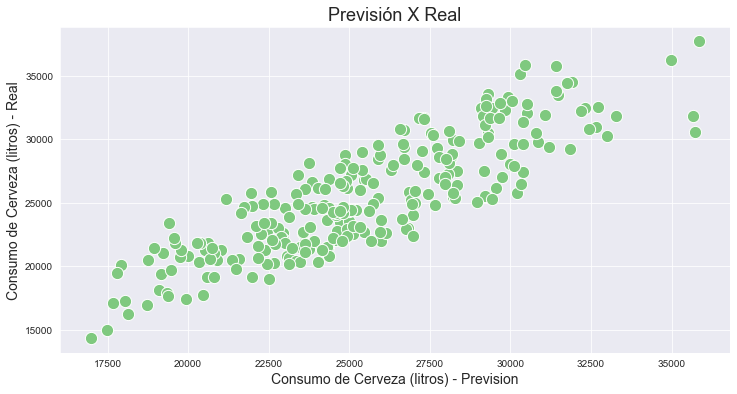

In [50]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train, s=150)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsión X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveza (litros) - Prevision', fontsize=14)
ax.set_ylabel('Consumo de Cerveza (litros) - Real', fontsize=14)
ax

## Obteniendo los resíduos

In [51]:
residuo = y_train - y_previsto_train
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

## Gráfico de dispersión entre valor estimado y resíduos

Método informal de verificación de la hipótesis de variancia constante de los resíduos (homocedasticidade)

<AxesSubplot:title={'center':'Residuos X Previsión'}, xlabel='Consumo de Cerveza (litros) - Prevision', ylabel='Residuos'>

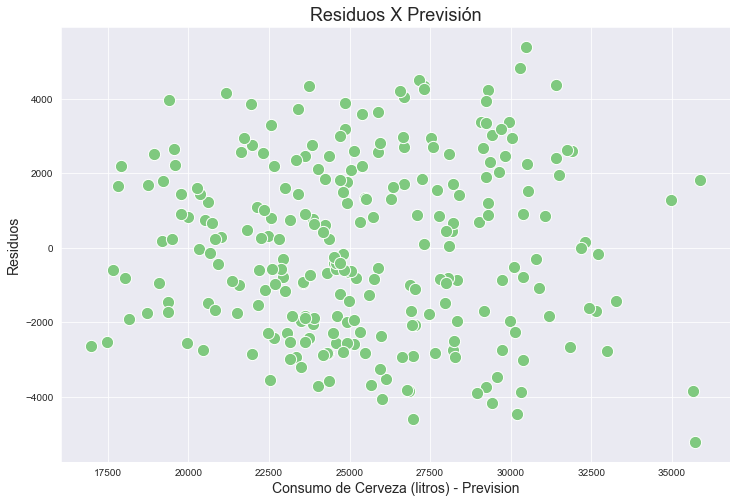

In [52]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(12,8)
ax.set_title('Residuos X Previsión', fontsize=18)
ax.set_xlabel('Consumo de Cerveza (litros) - Prevision', fontsize=14)
ax.set_ylabel('Residuos', fontsize=14)
ax

## Utilizando los resíduos al cuadrado

<img width='800px' src='img/var_u.jpg'>
Fuente: Econometria Básica - 5ª edição - Gujarati e Porter

<AxesSubplot:title={'center':'Residuos X Previsión'}, xlabel='Consumo de Cerveza (litros) - Prevision', ylabel='Residuos'>

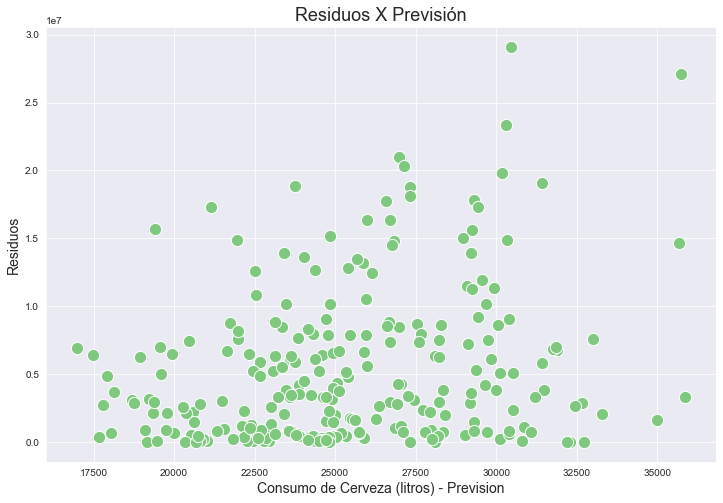

In [53]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(12,8)
ax.set_title('Residuos X Previsión', fontsize=18)
ax.set_xlabel('Consumo de Cerveza (litros) - Prevision', fontsize=14)
ax.set_ylabel('Residuos', fontsize=14)
ax

## Graficando la distribución de frecuencias de los resíduos

<AxesSubplot:title={'center':'Distribución de Frecuencias de los Resíduos'}, xlabel='Litros', ylabel='Density'>

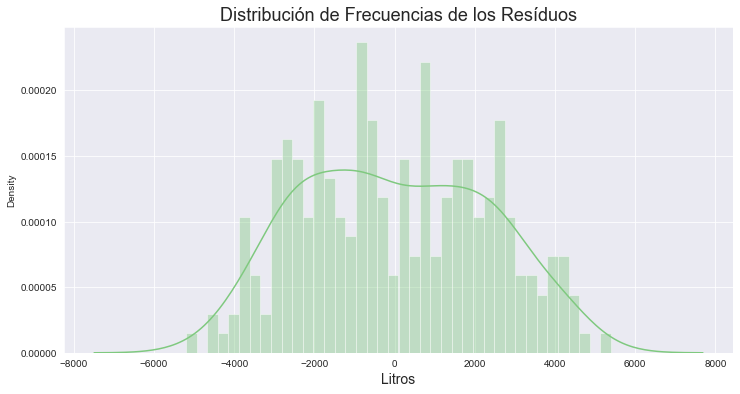

In [73]:
ax = sns.distplot(residuo, bins=40)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribución de Frecuencias de los Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimación de un nuevo modelo reemplazando la variable explicativa Temperatura máxima por Temperatura promedio

In [55]:
X2 = datos[['temp_promedio', 'lluvia', 'fds']]

## Creando los datasets de entrenamiento y prueba

In [56]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size=0.3, random_state=2811)

## Instanciando la clase *LinearRegression()*

In [57]:
modelo2=LinearRegression()

## Utilizando el método *fit()* del objeto "modelo_2" para estimar el modelo lineal utilizando los datos de ENTRENAMIENTO (y2_train e X2_train)

In [58]:
modelo2.fit(X2_train, y2_train)

LinearRegression()

## Obtener el coeficiente de determinación (R²) del nuevo modelo estimado y compararlo con el resultado del modelo anterior

In [59]:
print('Modelo con Temp. Promedio')
print('R² = {}'.format(modelo2.score(X2_train, y2_train).round(2)))

Modelo con Temp. Promedio
R² = 0.66


In [60]:
print('Modelo con Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo con Temp. Máxima
R² = 0.73


## Generando previsiones para los datos de PRUEBA (X_test y X2_test) utilizando el método *predict()* de los objetos "modelo" y "modelo_2"

In [61]:
y_previsto = modelo.predict(X_test)
y_previsto2 = modelo2.predict(X2_test)

## Obteniendo el coeficiente de determinación (R²) para las previsiones de los dos modelos

In [62]:
print('Modelo con Temp. Promedio')
print('R² = {}'.format(metrics.r2_score(y2_test,y_previsto2).round(2)))

Modelo con Temp. Promedio
R² = 0.66


In [63]:
print('Modelo con Temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test,y_previsto).round(2)))

Modelo con Temp. Máxima
R² = 0.69


# <font color='red' style='font-size: 30px;'>Otras Métricas de Regresión</font>
<hr style='border: 2px solid red;'>

## Métricas de regresión
<hr>

fuente: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algunas estadísticas obtenidas del modelo de regresión son muy útiles como criterio para comparar modelos estimados y para seleccionar el mejor modelo, las principales métricas de regresión que proporciona scikit-learn para modelos lineales son las siguientes:

### Error Cuadrático Medio

Promedio de los cuadrados de los errores. Mejores ajustes presentan $EQM$ más bajo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz de Error Cuadrático Medio

Raíz cuadrada del promedio de los cuadrados de los errores. Mejores ajustes presentanm $\sqrt{EQM}$ más bajo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obteniendo métricas para el modelo con Temperatura Promedio

In [64]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


## Obteniendo métricas para el modelo con Temperatura Máxima

In [65]:
EQM_2 = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2_2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


# <font color='red' style='font-size: 30px;'>Guardando y Cargando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [66]:
X_test[0:1]

,temp_max,lluvia,fds
5,30.5,12.2,0


In [67]:
entrada = X_test[0:1]

## Generando previsión puntual

In [68]:
modelo.predict(entrada)[0]

26094.901775262017

## Creando un simulador simple

In [69]:
temp_max=30.5
lluvia=12.2
fds=0
entrada= [[temp_max,lluvia,fds]]
print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


## Guardando el modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El módulo <b>pickle</b> implementa protocolos binários para serializar y desserializar la estructura de un objeto Python.</p>

In [70]:
import pickle

In [71]:
output=open('modelo_consumo_cerveza','wb')
pickle.dump(modelo, output)
output.close()

### En un nuevo notebook/proyecto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveza','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
lluvia = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```